<a href="https://colab.research.google.com/github/AnikaitLakhotia/Machine-Learning/blob/main/CIFAR_10_with_Conv_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [ ]:
# Load Data
cifar10 = keras.datasets.cifar10
(x_train_full, y_train_full), (x_valid, y_valid) = cifar10.load_data()

In [ ]:
# Data Augmentation
width_shift = 3/32
height_shift = 3/32
flip = True

datagen = ImageDataGenerator(
    horizontal_flip=flip,
    width_shift_range=width_shift,
    height_shift_range=height_shift,
    )
datagen.fit(x_train)

In [ ]:
# Callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20,
 restore_best_weights=True)

ReduceOnPlateau = keras.callbacks.ReduceLROnPlateau(
monitor='val_loss',
factor=0.1,
patience=10,
)

root_logdir = os.path.join(os.curdir, "my_logs2")
def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [ ]:
# Model Architecture:
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D,
 kernel_size=3, activation='relu', padding="SAME",kernel_initializer="he_normal",
 kernel_regularizer=keras.regularizers.l2(0.01))
model = keras.models.Sequential([
 DefaultConv2D(filters=64, kernel_size=7, input_shape=[32, 32, 3]),
 layers.BatchNormalization(),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=128),
 layers.BatchNormalization(),
 DefaultConv2D(filters=128),
 layers.BatchNormalization(),
 keras.layers.MaxPooling2D(pool_size=2),
 DefaultConv2D(filters=256),
 layers.BatchNormalization(),
 DefaultConv2D(filters=256),
 layers.BatchNormalization(),
DefaultConv2D(filters=512),
 layers.BatchNormalization(),
 DefaultConv2D(filters=512),
 layers.BatchNormalization(),
 keras.layers.MaxPooling2D(pool_size=2),
 keras.layers.Flatten(),
 keras.layers.Dense(units=128, activation='relu'),
 layers.BatchNormalization(),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=64, activation='relu'),
 layers.BatchNormalization(),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=10, activation='softmax'),
])

In [ ]:
# Model Compilation
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
# Model Training
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
         steps_per_epoch=len(x_train) // 32, epochs=80,validation_data=(x_valid, y_valid),
 callbacks=[tensorboard_cb,early_stopping_cb,ReduceOnPlateau])

Epoch 1/80
1250/1250 [==============================] - 37s 29ms/step - loss: 3.8935 - accuracy: 0.6101 - val_loss: 3.6763 - val_accuracy: 0.5226 - lr: 0.0100
Epoch 2/80
1250/1250 [==============================] - 42s 34ms/step - loss: 2.8928 - accuracy: 0.6360 - val_loss: 2.4223 - val_accuracy: 0.6765 - lr: 0.0100
Epoch 3/80
1250/1250 [==============================] - 34s 28ms/step - loss: 2.2823 - accuracy: 0.6526 - val_loss: 2.0709 - val_accuracy: 0.6469 - lr: 0.0100
Epoch 4/80
1250/1250 [==============================] - 35s 28ms/step - loss: 1.9041 - accuracy: 0.6694 - val_loss: 1.8388 - val_accuracy: 0.6379 - lr: 0.0100
Epoch 5/80
1250/1250 [==============================] - 35s 28ms/step - loss: 1.6890 - accuracy: 0.6757 - val_loss: 1.7098 - val_accuracy: 0.6264 - lr: 0.0100
Epoch 6/80
1250/1250 [==============================] - 35s 28ms/step - loss: 1.5470 - accuracy: 0.6851 - val_loss: 1.9658 - val_accuracy: 0.5459 - lr: 0.0100
Epoch 7/80
1250/1250 [========================

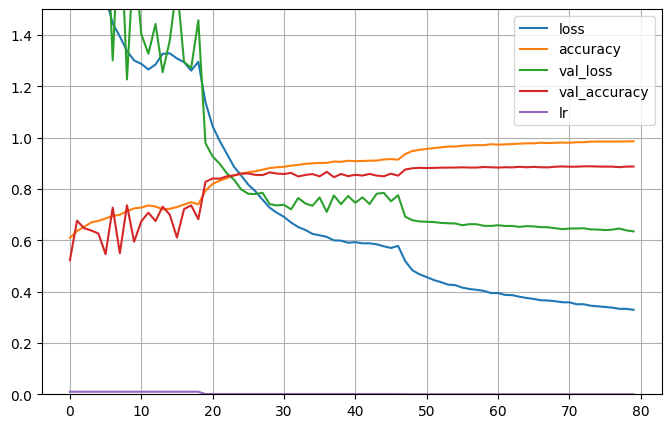

In [ ]:
# Plot Metrics
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # set the vertical range to [0-1]
plt.show()